In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, TargetEncoder
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



Initial Modification
           goal  disable_communication country  staff_pick  backers_count  \
0        1500.0                  False      US       False              0   
1         500.0                  False      US       False              0   
2      100000.0                  False      US       False              5   
3        5000.0                  False      US       False              0   
4        3222.0                  False      DE       False             17   
...         ...                    ...     ...         ...            ...   
20627   32500.0                  False      CH       False            173   
20628  100000.0                  False      DE       False             13   
20629   10000.0                  False      US       False              0   
20630    2500.0                  False      US       False              0   
20631   50000.0                  False      IE       False             10   

       static_usd_rate   usd_pledged  category  spotl

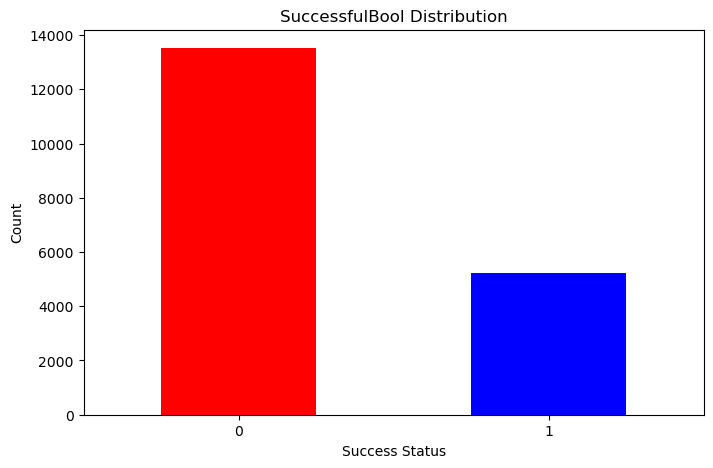


Country:
 country
US    12805
GB     2311
CA      976
AU      620
DE      328
NL      294
FR      293
IT      222
ES      156
DK      118
NZ       97
CH       89
SE       88
IE       77
NO       60
AT       58
MX       53
BE       45
HK       30
SG       21
LU        2
Name: count, dtype: int64


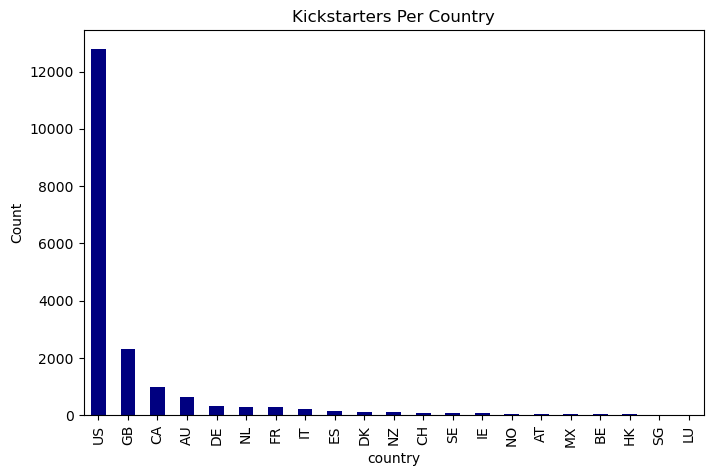


Category:
 category
Web             3325
Hardware        3248
Software        2631
Gadgets         2336
Plays           1184
Apps            1168
Wearables        971
Musical          791
Sound            528
Festivals        482
Robots           473
Flight           373
Experimental     321
Immersive        277
Makerspaces      203
Spaces           182
Places           100
Shorts            40
Thrillers         20
Webseries         20
Restaurants       20
Blues             20
Academic          20
Comedy            10
Name: count, dtype: int64


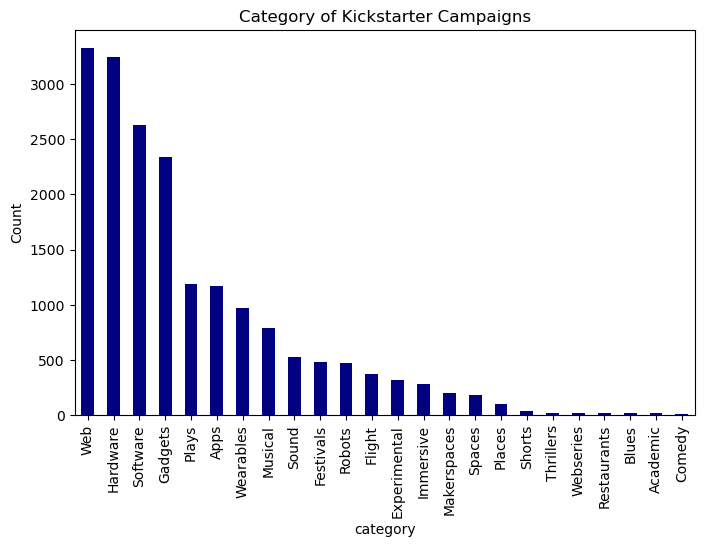


After MULT
               goal  disable_communication country  staff_pick  backers_count  \
0       1500.000000                      0      US           0              0   
1        500.000000                      0      US           0              0   
2     100000.000000                      0      US           0              5   
3       5000.000000                      0      US           0              0   
4       3591.284600                      0      DE           0             17   
...             ...                    ...     ...         ...            ...   
2369    4289.404400                      0      AU           0              1   
2370    4282.163750                      0      GB           0              2   
2371    1530.816870                      0      GB           0              1   
2372    2524.729725                      0      GB           0              0   
2373    1200.000000                      0      US           0              0   

      usd_pledg

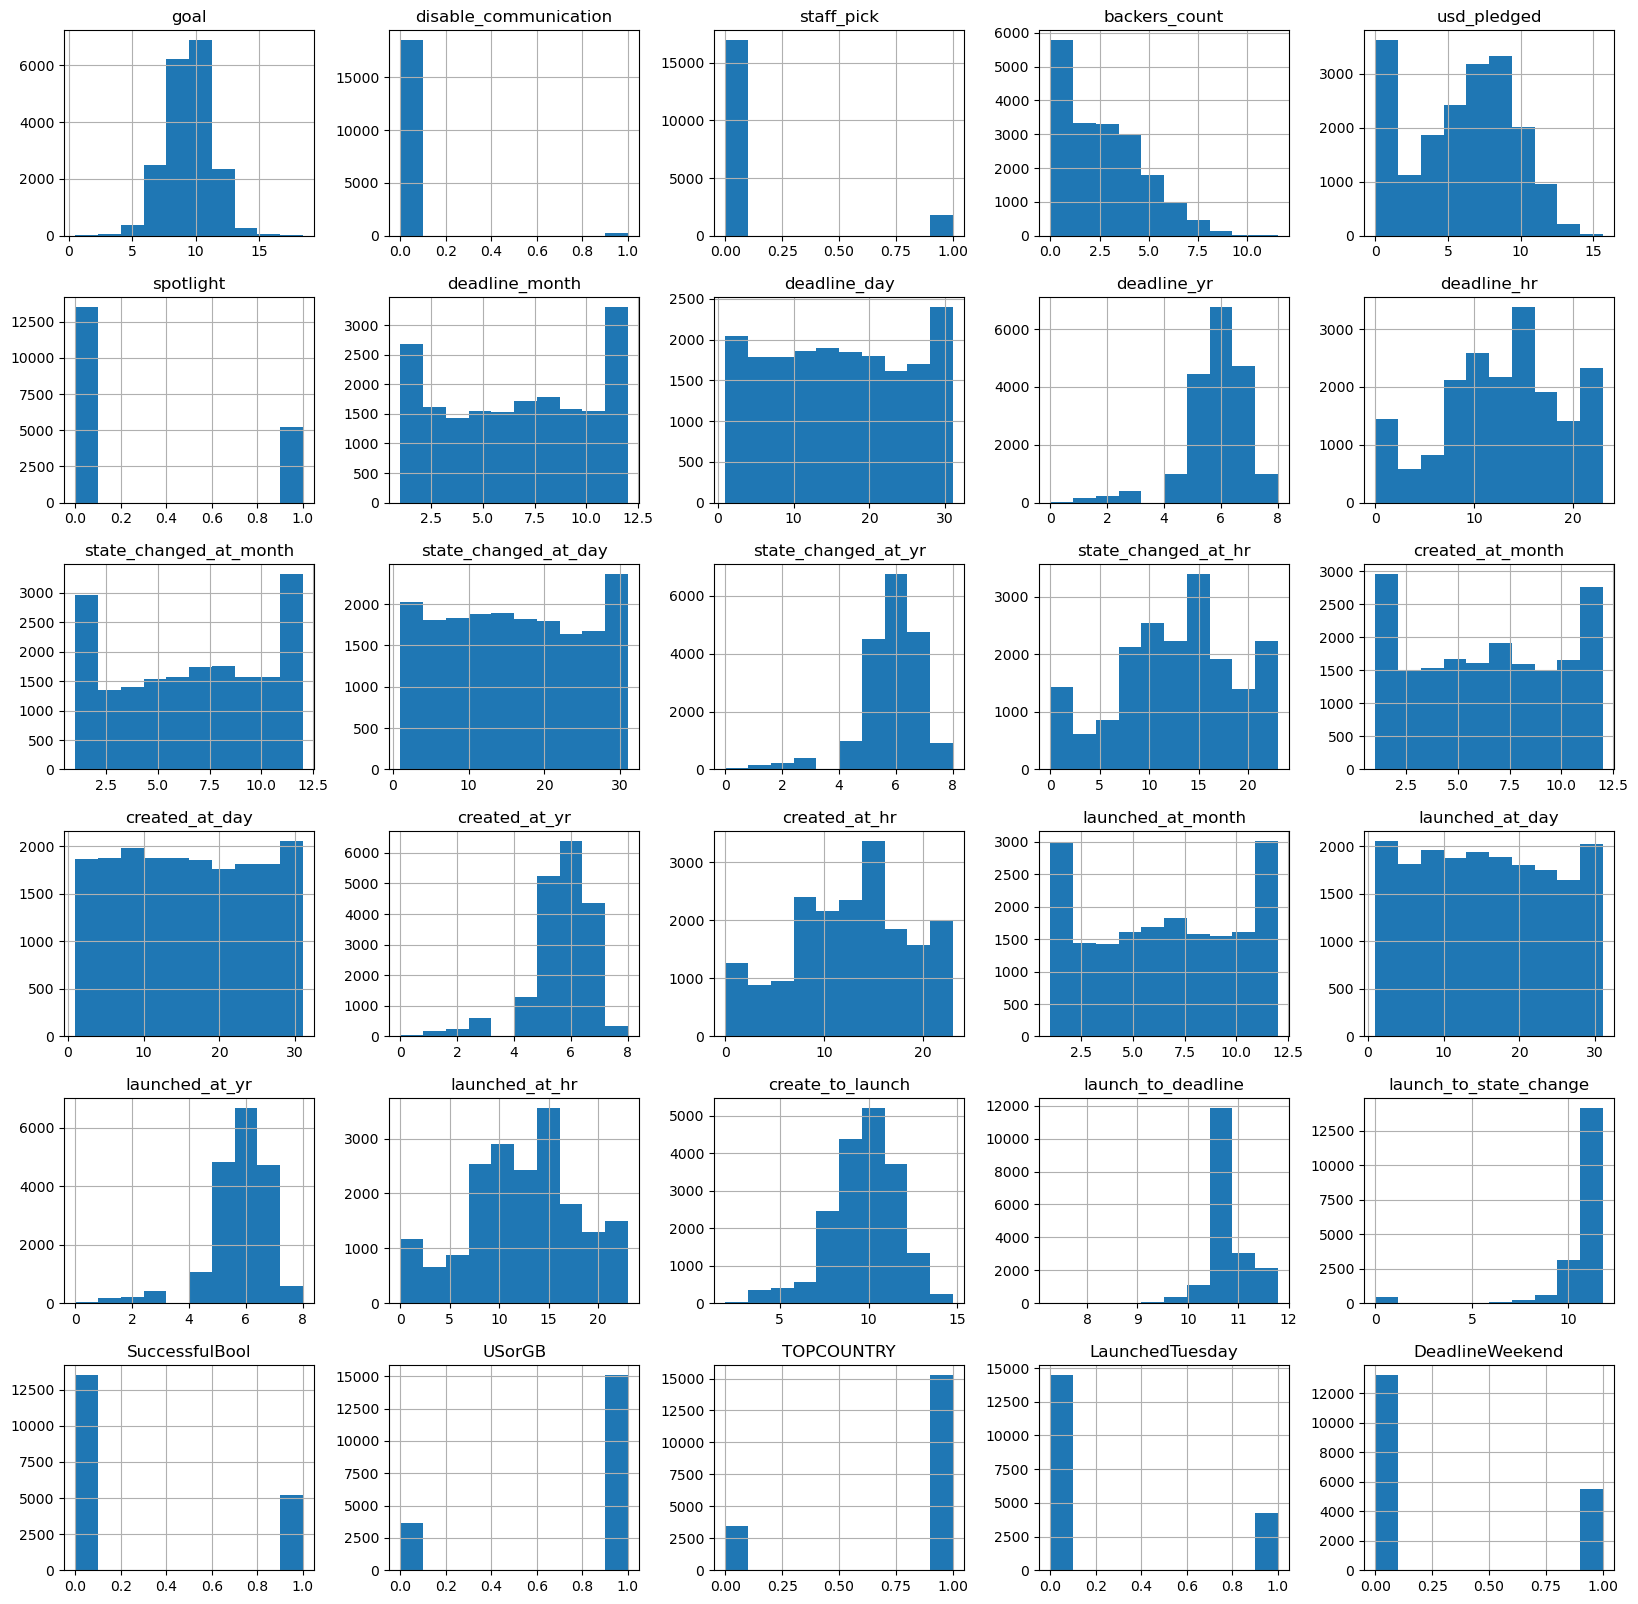


Histograms for Goal, Create To Launch, and Launch To Deadline:



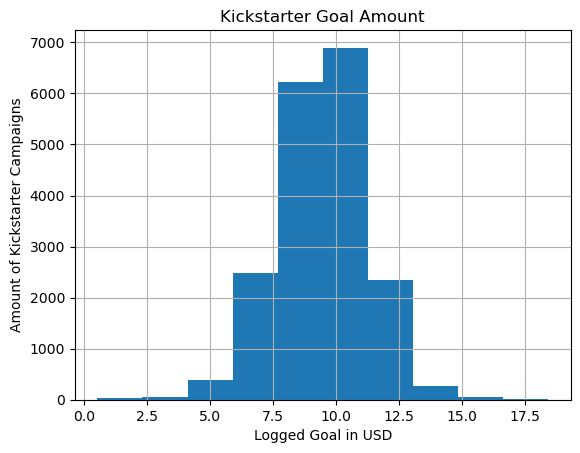

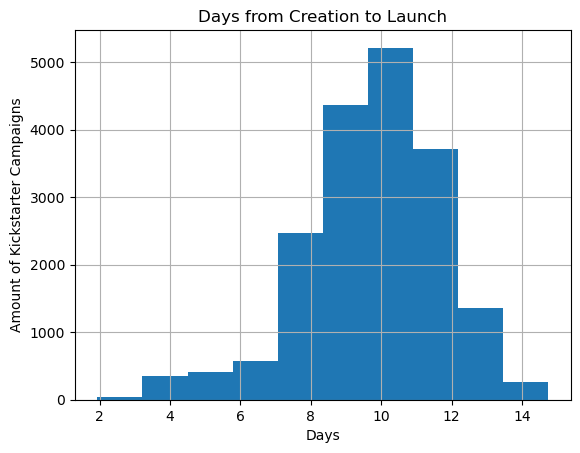

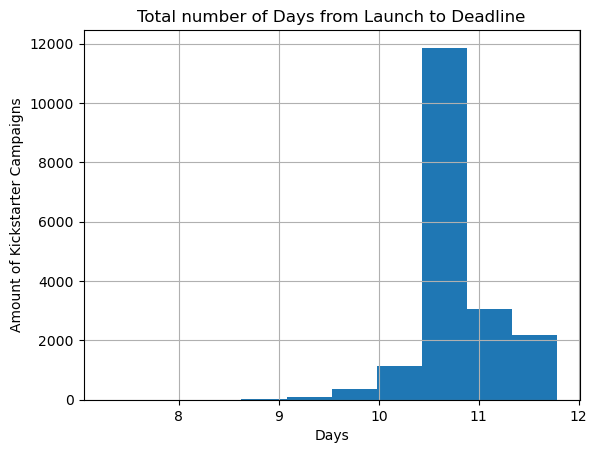

            goal  disable_communication country  staff_pick  backers_count  \
0       7.313887                      0      US           0       0.000000   
1       6.216606                      0      US           0       0.000000   
2      11.512935                      0      US           0       1.791759   
3       8.517393                      0      US           0       0.000000   
4       8.186544                      0      DE           0       2.890372   
...          ...                    ...     ...         ...            ...   
20627  10.389729                      0      CH           0       5.159055   
20628  11.566283                      0      DE           0       2.639057   
20629   9.210440                      0      US           0       0.000000   
20630   7.824446                      0      US           0       0.000000   
20631  11.064027                      0      IE           0       2.397895   

       category  deadline_month  deadline_day  deadline_yr  dea

In [ ]:
# Load the dataset
data = pd.read_csv("kickstarter_data_full.csv", low_memory=False)

print("\nInitial Modification")
data1 = data.drop(columns=[data.columns[0], 'id', 'photo', 'name', 'blurb', 'state', 'pledged', 'slug', 'currency',
'currency_symbol', 'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'creator', 'location', 'profile', 'urls', 'source_url', 'friends', 'is_starred', 'is_backing', 'permissions','deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday',
'blurb_len', 'blurb_len_clean', 'name_len', 'name_len_clean','launched_at_weekday','create_to_launch_days', 'launch_to_deadline_days','launch_to_state_change_days'], axis = 1)

print(data1)
print(data1.head(1999))

for col in data1:
    print(col)

print(data1.isnull().sum())
data1 = data1.dropna()
print(data1.isnull().sum())

bool_cols = ['disable_communication', 'staff_pick', 'spotlight', 'SuccessfulBool', 'USorGB', 'TOPCOUNTRY', 'LaunchedTuesday', 'DeadlineWeekend']
data1[bool_cols] = data1[bool_cols].astype(int)

    
def to_minutes(x):
    if isinstance(x, str):
        parts = x.split()
        days = int(parts[0]) if 'days' in x else 0
        time_str = parts[-1]
        h, m, s = time_str.split(':')
        return days * 1440 + int(h) * 60 + int(m) + float(s.split('.')[0]) / 60
    return x

data1['create_to_launch'] = data1['create_to_launch'].apply(to_minutes)
data1['launch_to_deadline'] = data1['launch_to_deadline'].apply(to_minutes)
data1['launch_to_state_change'] = data1['launch_to_state_change'].apply(to_minutes)




print("\nSuccessfulBool distribution:\n", data1['SuccessfulBool'].value_counts())
plt.figure(figsize=(8, 5))
data1['SuccessfulBool'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('SuccessfulBool Distribution')
plt.xlabel('Success Status')
plt.ylabel('Count')
plt.xticks(rotation=0) 


print("\nCountry:\n", data1['country'].value_counts())
plt.figure(figsize=(8, 5))
data1['country'].value_counts().plot(kind='bar', color=['navy'])
plt.title('Kickstarters Per Country')
plt.ylabel('Count')
plt.show()


print("\nCategory:\n", data1['category'].value_counts())
plt.figure(figsize=(8, 5))
data1['category'].value_counts().plot(kind='bar', color=['navy'])
plt.title('Category of Kickstarter Campaigns')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()

data1['goal'] = data1['goal'] * data1['static_usd_rate']
data1 = data1.drop(columns='static_usd_rate', axis=1)

print("\nAfter MULT")
print(data1.head(1999))

for col in ['goal', 'create_to_launch', 'launch_to_deadline', 'backers_count', 'launch_to_state_change','usd_pledged']:
    data1[col] = np.log1p(data1[col])

print("\nAfter LOG")
print(data1.head(1999))

for yr in ['deadline_yr', 'state_changed_at_yr', 'created_at_yr', 'launched_at_yr']:
    data1[yr] = data1[yr] - 2009

print("\nAfter SUB\n")
print(data1.head(1999))


print(f"\nHistogram Set:\n")
data1.hist(figsize=(20, 20))
plt.show()

print(f"\nHistograms for Goal, Create To Launch, and Launch To Deadline:\n")
data1['goal'].hist()
plt.title('Kickstarter Goal Amount')
plt.ylabel('Amount of Kickstarter Campaigns')
plt.xlabel('Logged Goal in USD')
plt.xticks(rotation=0) 
plt.show()

data1['create_to_launch'].hist()
plt.title('Days from Creation to Launch')
plt.ylabel('Amount of Kickstarter Campaigns')
plt.xlabel('Days')
plt.xticks(rotation=0) 
plt.show()

data1['launch_to_deadline'].hist()
plt.title('Total number of Days from Launch to Deadline')
plt.ylabel('Amount of Kickstarter Campaigns')
plt.xlabel('Days')
plt.xticks(rotation=0) 
plt.show()


X1 = data1.drop(columns=['SuccessfulBool', 'spotlight','usd_pledged'], axis = 1)
Y1 = data1['SuccessfulBool']
Y = Y1.values
X = X1.values
print(X1)
print(Y1)
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42, stratify=Y1)

            goal  disable_communication   country  staff_pick  backers_count  \
17206  10.345362                      0  0.451315           0       3.044522   
12020  10.308986                      0  0.282880           1       6.396930   
16938  11.261683                      0  0.355571           0       5.905362   
9497   11.512935                      0  0.279879           0       6.638568   
1334   10.126671                      0  0.289197           0       3.828641   
...          ...                    ...       ...         ...            ...   
15453   9.105091                      0  0.328457           0       1.791759   
11933   8.292812                      0  0.153952           0       1.098612   
12873  10.819798                      0  0.303044           1       4.941642   
1979    6.685861                      0  0.305208           0       3.218876   
3111    8.517393                      0  0.298131           0       0.000000   

       category  deadline_month  deadli

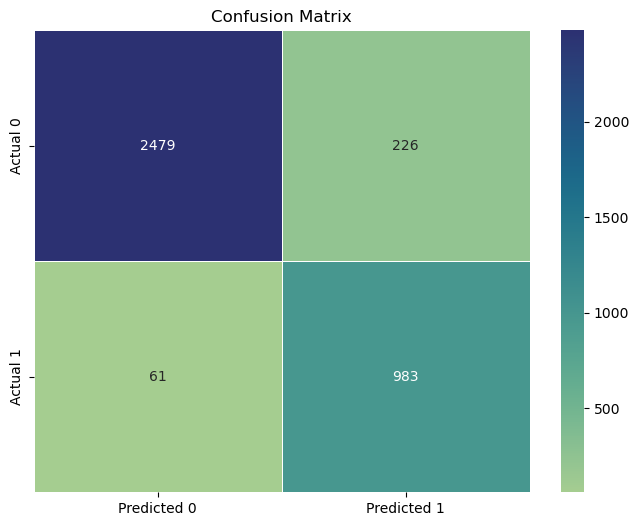

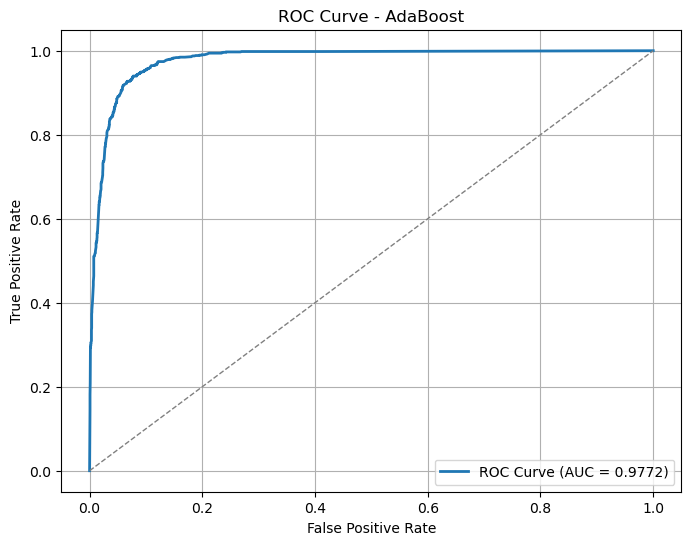

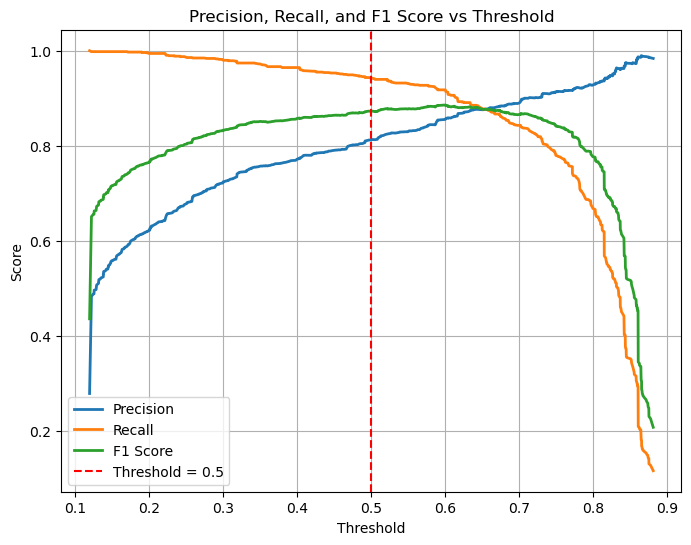

In [ ]:
print(X_train)
print(X_test)

encoder1 = TargetEncoder()
encoder2 = TargetEncoder()
X_train['country'] = encoder1.fit_transform(X_train[['country']], Y_train)
X_train['category'] = encoder2.fit_transform(X_train[['category']], Y_train)
X_test['country'] = encoder1.transform(X_test[['country']])
X_test['category'] = encoder2.transform(X_test[['category']])

print("-----------------")
print(X_train)
print("-----------------")
print(X_test)

for num_features in range(1, 10): 
    base_tree = DecisionTreeClassifier(max_depth=4, class_weight='balanced', random_state=42)
    rfe = RFE(estimator=base_tree, n_features_to_select=num_features)
    rfe.fit(X_train, Y_train)
    
    selected = X_train.columns[rfe.support_]
    X_train_rfe = X_train[selected]
    X_test_rfe = X_test[selected]

    base_tree.fit(X_train_rfe, Y_train)
    
    train_score = base_tree.score(X_train_rfe, Y_train)
    test_score = base_tree.score(X_test_rfe, Y_test)
    
    print(f"n_features: {num_features}, Test Score: {test_score:.4f}, Train Score: {train_score:.4f}")
print(np.isnan(X_train_rfe).sum().sum())
print(np.isinf(X_train_rfe).sum().sum())


base_tree = DecisionTreeClassifier(max_depth= 4, class_weight='balanced', random_state=42)

ada = AdaBoostClassifier(estimator=base_tree, random_state=42)

param_grid_ada = {
    'estimator__max_depth': [4, 5, 6],
    'estimator__min_samples_leaf': [1, 2, 3],
    'estimator__min_samples_split': [2, 3, 4],
    'n_estimators': [75,150, 200, 250],
    'learning_rate': [0.1, 0.15, 0.2],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    cv=5,
    scoring='f1',
    verbose=1,
    error_score='raise'
)

grid_search_ada.fit(X_train_rfe, Y_train)
best_ada = grid_search_ada.best_estimator_


print("Best AdaBoost Parameters:", grid_search_ada.best_params_)
print("Train Accuracy:", best_ada.score(X_train_rfe, Y_train))
print("Test Accuracy:", best_ada.score(X_test_rfe, Y_test))


y_test_pred = best_ada.predict(X_test_rfe)
y_test_proba = best_ada.predict_proba(X_test_rfe)[:, 1]

#Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(Y_test, y_test_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(Y_test, y_test_pred)
print(cm)


cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='crest', linewidths=0.5)
plt.title("Confusion Matrix")
plt.show()

#ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_test_proba)
roc_auc = roc_auc_score(Y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.title("ROC Curve - AdaBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#Precision-recall-F1 vs threshold
precisions, recalls, pr_thresholds = precision_recall_curve(Y_test, y_test_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

plt.figure(figsize=(8, 6))
plt.plot(pr_thresholds, precisions[:-1], label="Precision", linewidth=2)
plt.plot(pr_thresholds, recalls[:-1], label="Recall", linewidth=2)
plt.plot(pr_thresholds, f1_scores[:-1], label="F1 Score", linewidth=2)
plt.axvline(x=0.5, color='red', linestyle='--', label="Threshold = 0.5")
plt.title("Precision, Recall, and F1 Score vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()